### <font color = red> *** FILL HERE *** </font>
Type your name here <br>
Student number <br>
Utumail address  <br>
Date  <br>

# Data Analysis and Knowledge Discovery: Exercise 3, Supervised learning

This is the template for the third exercise. The idea of this exercise is to apply supervised learning to predict the ship type using certain attributes (speed, destination harbour...) and a K nearest neighbors (kNN) classifier.

### General guidance for exercises 

- Answer **all** questions below, even if you can't get your script to fully work
- Write clear and easily readable code, include explanations what your code does
- Make informative illustrations: include labels for x and y axes, legends and captions for your plots
- Before saving the ipynb file (and possible printing) run: "Restart & Run all", to make sure you return a file that works as expected.
- Grading: *Fail*/*Pass*/*Pass with honors* (+1)
- +1 bonus point (grading *Pass with honors*) requires a **completely** correct solution and also thorough analysis. 
- If you encounter problems, Google first. If you can't find an answer to the problem, don't hesitate to ask in the Moodle discussion or directly via moodle chat or email from the course assistant responsible for the exercise, Valtteri Nieminen, vajnie@utu.fi <font color = red></font>
- Note! Don't leave it to the last moment! No feedback service during weekends.
- The deadline is <font color = red> on 6.12, 19:00</font>
- Using the colors for titles in markdown makes the document more readable and easier to check. 

- This excercise is a bit more freeform than the last one and you don't have to stick to only the cells that are already in the notebook - you can make more if you need to, but it is advisable to comment on new cells what the cell is related to. 
- There are also added summaries of whats included inthe subparts of exercises  just to help you get a better picture of what is required. You will still answer these excercises under their own titles.

### Gather **all** packages needed for this notebook here:
- you can use other packages as well, but this excercise can be completed with those below

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math as math
import sklearn as sklearn
import random as random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import LeaveOneOut

________
## <font color = dimgrey> Data import </font> 


In [2]:
data_path = "https://raw.githubusercontent.com/vajnie/DADK_2021/main/shipdata_2021.csv"

In [3]:
#Import the data here
data = pd.read_csv(data_path) #data is presumed to be in the same folder. 

_______________
## <font color = dimgrey> 1) Data preprocessing
Below are all the questions related to this topic, but you should put them under their own respective titles that are found below.

- a) First, find out how many different destinations there are in the data. Do you need to make any preprocessing? **1p** <br>
- b) Destination harbor is a categorical variable. It needs to be converted into a numerical representation. Explain, why do you need to make this step? You can use get_dummies from pandas to implement one-hot coding for categorical features **1p**

- c) Plot Gross tonnage versus the ship Length. Use different colors for different ship types. According to the plot, there is one <b> clear outlier. </b>  Correct the outlying value by changing it to the value 326 and rerun the plot after you have made the correction. **1p**
- d) It is good to exploit domain knowledge and make some reasonable transformation to the feature values to improve the expected results and/or to avoid redundancy. Find out what gross tonnage means. Make some transformation to Length values to acquire a linear relationship between the transformed length and Gross tonnage values. You can find the needed information  https://en.wikipedia.org/wiki/Gross_tonnage. Look at the formula and think how you can get the two variables similarly scaled. If you are having trouble, just experiment with different transformations before asking help. By plotting you can see what the relationship looks like after a transformation you have tried **1p**
- e) The numerical variables have quite different ranges. To ensure that all variables can have the same importance on the model, perform Z-score standardization. Perform it for speed, the ***transformed length*** variable, and breadth **1p**
_______________________

#### <font color = dimgrey> a) Find out how many different destinations there are in the data. Are there any mistakes and do you need to do any preprocessing? Give your code and answer below **1p** </font>

In [5]:
### Code for 1.a)
uniq = data.groupby('Destination')['MMSI'].nunique()
print (uniq)

Destination
Hamina           19
Helsinki          1
Kotka             8
Kronshtadt        2
Kunda             2
Muuga            12
Paldiski          9
Porvoo           18
Primorsk          5
Sillamae          1
Sillamäe          2
Tallinn          12
Ust-Luga         16
Valko-Loviisa     9
Viipuri           6
Vuosaari          7
Vysotsk           5
Name: MMSI, dtype: int64


<font color = red> \*** Some of the destinations are misspelled. ***

____________
#### <font color = dimgrey> b) Destination harbor is a categorical variable. It needs to be somehow converted into a numerical expression. Explain, why do you need to make this step? 
You can use get_dummies from pandas to implement onehot coding for categorical features **1p**

In [11]:
### Code for 1.b)
category_to_num = pd.get_dummies(data, columns=['Destination'])
category_to_num

,MMSI,Speed,COG,Ship_type,Gross_tonnage,Length,Breadth,Destination_Hamina,Destination_Helsinki,Destination_Kotka,...,Destination_Porvoo,Destination_Primorsk,Destination_Sillamae,Destination_Sillamäe,Destination_Tallinn,Destination_Ust-Luga,Destination_Valko-Loviisa,Destination_Viipuri,Destination_Vuosaari,Destination_Vysotsk
0,212209000,10.1377,64.3074,Cargo,3416,94.91,15.34,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,212436000,13.5256,77.0755,Tanker,6280,116.90,18.00,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,219082000,9.9416,74.6762,Tanker,9980,141.20,21.90,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,219083000,11.6038,74.7529,Tanker,9980,141.20,21.60,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,219426000,11.9203,56.3253,Tanker,3219,99.90,15.00,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,273374820,10.0396,74.6253,Tanker,4979,139.90,16.70,0,0,0,...,0,0,0,0,0,0,0,0,0,1
130,273385070,9.3507,74.5454,Tanker,4979,139.90,16.94,0,0,0,...,0,0,0,0,0,0,0,0,0,1
131,273388150,9.7668,68.7159,Tanker,5075,140.85,16.86,0,0,0,...,0,0,0,0,0,0,0,0,0,1
132,636092755,11.1554,73.7013,Tanker,23240,183.00,27.37,0,0,0,...,0,0,0,0,0,0,0,0,0,1


<font color = red> \*** Numerical data can be used for calculation in statistic and categorical data can be used for research purpouses which require eg. a opinnion. ***

_______________
####  <font color = dimgrey> c) Plot Gross tonnage versus the ship Length. 

- Use different colors for different ship types. According to the plot, there is one <b> clear </b> outlier. <b> Correct the outlying value by changing it to the value 326 </b> and rerun the plot after you have made the correction. **1p**
- If you want to do things very nicely you could wrap the plotting in a function so you don't paste the same code twice, but this is not required.

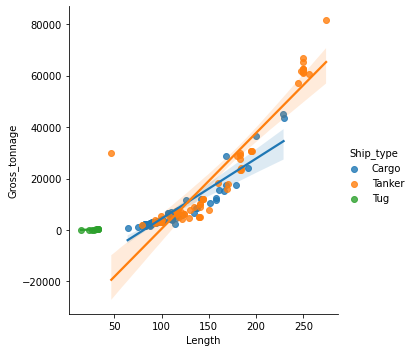

In [28]:
### Code for 1 c) plot with the outlier

sb.lmplot(x='Length', y='Gross_tonnage', data=data, hue='Ship_type')

Ship_type
Cargo      3259.0
Tanker    10957.5
Tug         256.0
Name: Gross_tonnage, dtype: float64

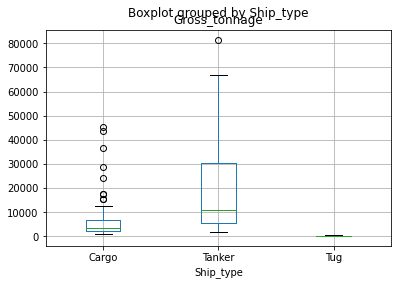

In [33]:
### Code for 1 c) find the outlier and replot
data.boxplot(column='Gross_tonnage', by='Ship_type')
data.groupby('Ship_type')['Gross_tonnage'].median()

In [8]:
### Code for 1 c) rerun the plot with the correction made

#### <font color = dimgrey> d) Exploit your domain knowledge and transform to improve the expected results and/or to avoid redundancy. 
- Find out what gross tonnage means. Make some transformation to Length values to acquire a linear relationship between the transformed length and Gross tonnage values. Plot the situation after the transformation **1p** 
- You can find the needed information in for example https://en.wikipedia.org/wiki/Gross_tonnage. Look at the formula and think how you can get the two variables similarly scaled. If you are having trouble, just experiment with different transformations before asking help. By plotting you can see what the relationship looks like after a transformation you have tried
  

In [9]:
### Code for 1d 

<font color = red> \*** Answer here *** what does gross tonnage mean? What transformation did you do? Why is it useful? 

#### <font color = dimgrey> e) The numerical variables have quite different ranges. To ensure that all variables can have the same importance on the model, perform Z-score standardization. Perform it for speed, transformed length, and breadth **1p**

In [10]:
### Code for 1e

______________
## <font color = lightcoral>2. Classification </font> 

Predict the **ship type** using **speed, destination, transformed length, and breadth** as features. Find an estimation for the classification accuracy (number of correctly classified ships to the total number of ships) using **random training and test sets**. <br>

Below is a summary of exercises for part 2
- a) Produce training and test data **1p**
     - Gather the normalized features and one-hot-coded destination columns as array __X__ (input variables), and the ship type as array **y** (output variable)     
     - Divide the data randomly into training (20%) and test (80%) sets
     - Do you need to use stratification? **Explain your decision**
- b) Train the model and test its performance **1p**
     - Use kNN classifier with k=3
     - Print out the confusion matrix. How does the model perform with different ship types?
     - What is the (total) classification accuracy?
 - Repeat the calculation 1000 times with different split of training/test data, and make a histogram of the results for classification accuracy **1p**
 - Discuss your results **1p**
 
 ______________

#### <font color = lightcoral> a) Produce training and test data 1p
- Gather the normalized features and one-hot-coded destination columns as array X (input variables), and the ship type as array y (output variable)
- Divide the data randomly into training (20%) and test (80%) sets
- Do you need to use stratification? **Explain your decision**

In [11]:
### Code for 2a

<font color = red> \*** Answer here (do you need to use strafication? Explain your decision) ***

_______________
#### <font color = lightcoral> b) Train the model and test its performance 1p
- Use a kNN classifier with k=3
- Print out the confusion matrix. <br>
- How does the model perform with different ship types? Where do you think the differences come from?<br>
- What is the (total) classification accuracy?

In [12]:
### Code for 2b

<font color = red> \*** Answer here *** - Discuss your results. What can you see? What do you think is relevant?

__________
## 3. <font color = navy> Classification accuracy using leave-one-out cross validation

Again, predict the **ship type** using **speed, destination, transformed length, and breadth** of the ship as features. Find an estimation for the classification accuracy using *leave-one-out cross validation (LOO CV)*. <br>

 - a) Use leave-one-out cross validation to estimate the model performance **1p**
     - Use kNN classifier with k=3
     - What is the classification accuracy? Compare the result with the one you got in the previous task
 - b) Which method gives better evaluation of the performance of the classifier with this data set? Explain your choice **1p**

In [13]:
### Code for 3

#### a) <font color = navy> What is the classification accuracy? Compare the result with the one you got in the previous task **1p**

<font color = red> \*** Answer here *** </font>
    
#### b) <font color = navy>  Which method gives better evaluation of the performance of the classifier with this data set? Why? 1p

<font color = red> \*** Answer here ***

____________
## <font color = forestgreen> 4. Model selection with leave-one-out cross validation

- a) Select the best model (kNN with selection of k) using leave-one-out cross validation (Repeat the model performance estimation with values k=1...30). Which value of k produces the best classification accuracy? **2p**
- b) If the number of k is still increased, what is the limit that the **1p** classification accuracy approaches? Why?
- d) Can you say something about the performance of this *selected* model with new, unseen data? Explain, how you could you estimate the performance of this selected model. **1p** 

In [14]:
# Code for 4

#### <font color = forestgreen>  a) Which value of k produces the best classification accuracy? **1p**</font>

<font color = red> \*** Answer here ***

#### <font color = forestgreen> b) If the number of k is still increased, what is the limit that the classification accuracy approaches? Why?

<font color = red> \*** Answer here ***

#### <font color = forestgreen> c) Can you say something about the performance of this *selected* model with new, unseen data? Explain, how you could you estimate the performance of this selected model. **1p**

<font color = red> \*** Answer here ***

________________
### <font color = red>  5. Testing with training data <font color = red> (this should never be done out of this exercise!) </font>

- Repeat the previous task but use the whole data for training **2p**
- Plot the resulting classification accuracy versus k=1...30. **Include the values from the previous task in the same figure**
- Comment your result. **Why** shouldn't you test with training data?

In [15]:
### CODE FOR 5: Repeat the previous task but use whole data for training

In [16]:
### CODE FOR 5: The plot

 <font color = red> \*** Answer here ***